### Problem Statement

Problem Statement A large company named XYZ, employs, at any given point of time, around 4000 employees. However, every year, around 15% of its employees leave the company and need to be replaced with the talent pool available in the job market. The management believes that this level of attrition (employees leaving, either on their own or because they got fired) is bad for the company, because of the following reasons -

The former employees’ projects get delayed, which makes it difficult to meet timelines, resulting in a reputation loss among consumers and partners
A sizeable department has to be maintained, for the purposes of recruiting new talent
More often than not, the new employees have to be trained for the job and/or given time to acclimatise themselves to the company
Hence, the management has contracted an HR analytics firm to understand what factors they should focus on, in order to curb attrition. In other words, they want to know what changes they should make to their workplace, in order to get most of their employees to stay. Also, they want to know which of these variables is most important and needs to be addressed right away.

Since you are one of the star analysts at the firm, this project has been given to you.

Goal of the case study You are required to model the probability of attrition. The results thus obtained will be used by the management to understand what changes they should make to their workplace, in order to get most of their employees to stay.



#### Importing Important Packages

In [70]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing
%matplotlib inline


In [71]:
dataset=pd.read_csv("general_data (1).csv") # Since this is CSV file no need to include Sheetname Like XLSX File

In [72]:
dataset.head()

,Age,Attrition,BusinessTravel,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeID,Gender,...,NumCompaniesWorked,Over18,PercentSalaryHike,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager
0,51,No,Travel_Rarely,Sales,6,2,Life Sciences,1,1,Female,...,1.0,Y,11,8,0,1.0,6,1,0,0
1,31,Yes,Travel_Frequently,Research & Development,10,1,Life Sciences,1,2,Female,...,0.0,Y,23,8,1,6.0,3,5,1,4
2,32,No,Travel_Frequently,Research & Development,17,4,Other,1,3,Male,...,1.0,Y,15,8,3,5.0,2,5,0,3
3,38,No,Non-Travel,Research & Development,2,5,Life Sciences,1,4,Male,...,3.0,Y,11,8,3,13.0,5,8,7,5
4,32,No,Travel_Rarely,Research & Development,10,1,Medical,1,5,Male,...,4.0,Y,12,8,2,9.0,2,6,0,4


In [73]:
dataset.describe().columns

Index(['Age', 'DistanceFromHome', 'Education', 'EmployeeCount', 'EmployeeID',
       'JobLevel', 'MonthlyIncome', 'NumCompaniesWorked', 'PercentSalaryHike',
       'StandardHours', 'StockOptionLevel', 'TotalWorkingYears',
       'TrainingTimesLastYear', 'YearsAtCompany', 'YearsSinceLastPromotion',
       'YearsWithCurrManager'],
      dtype='object')

In [74]:
dataset.describe()

,Age,DistanceFromHome,Education,EmployeeCount,EmployeeID,JobLevel,MonthlyIncome,NumCompaniesWorked,PercentSalaryHike,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager
count,4410.000000,4410.000000,4410.000000,4410.0,4410.000000,4410.000000,4410.000000,4391.000000,4410.000000,4410.0,4410.000000,4401.000000,4410.000000,4410.000000,4410.000000,4410.000000
mean,36.923810,9.192517,2.912925,1.0,2205.500000,2.063946,65029.312925,2.694830,15.209524,8.0,0.793878,11.279936,2.799320,7.008163,2.187755,4.123129
std,9.133301,8.105026,1.023933,0.0,1273.201673,1.106689,47068.888559,2.498887,3.659108,0.0,0.851883,7.782222,1.288978,6.125135,3.221699,3.567327
min,18.000000,1.000000,1.000000,1.0,1.000000,1.000000,10090.000000,0.000000,11.000000,8.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,2.000000,2.000000,1.0,1103.250000,1.000000,29110.000000,1.000000,12.000000,8.0,0.000000,6.000000,2.000000,3.000000,0.000000,2.000000
50%,36.000000,7.000000,3.000000,1.0,2205.500000,2.000000,49190.000000,2.000000,14.000000,8.0,1.000000,10.000000,3.000000,5.000000,1.000000,3.000000
75%,43.000000,14.000000,4.000000,1.0,3307.750000,3.000000,83800.000000,4.000000,18.000000,8.0,1.000000,15.000000,3.000000,9.000000,3.000000,7.000000
max,60.000000,29.000000,5.000000,1.0,4410.000000,5.000000,199990.000000,9.000000,25.000000,8.0,3.000000,40.000000,6.000000,40.000000,15.000000,17.000000


#### Finding out the Numerical Columns from the dataset whose value is in numbers

In [75]:
Numerical_columns=['Age', 'DistanceFromHome', 'Education', 'EmployeeCount', 'EmployeeID',
       'JobLevel', 'MonthlyIncome', 'NumCompaniesWorked', 'PercentSalaryHike',
       'StandardHours', 'StockOptionLevel', 'TotalWorkingYears',
       'TrainingTimesLastYear', 'YearsAtCompany', 'YearsSinceLastPromotion',
       'YearsWithCurrManager']

#### Finding Null Values

In [76]:
dataset.isnull().sum()

Age                         0
Attrition                   0
BusinessTravel              0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeID                  0
Gender                      0
JobLevel                    0
JobRole                     0
MaritalStatus               0
MonthlyIncome               0
NumCompaniesWorked         19
Over18                      0
PercentSalaryHike           0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           9
TrainingTimesLastYear       0
YearsAtCompany              0
YearsSinceLastPromotion     0
YearsWithCurrManager        0
dtype: int64

#### Filling the null values with the mean

In [77]:
dataset.fillna(dataset.mean(),inplace=True) ### inplace = True means replacing the orignal dataset

In [78]:
dataset.isnull().sum()

Age                        0
Attrition                  0
BusinessTravel             0
Department                 0
DistanceFromHome           0
Education                  0
EducationField             0
EmployeeCount              0
EmployeeID                 0
Gender                     0
JobLevel                   0
JobRole                    0
MaritalStatus              0
MonthlyIncome              0
NumCompaniesWorked         0
Over18                     0
PercentSalaryHike          0
StandardHours              0
StockOptionLevel           0
TotalWorkingYears          0
TrainingTimesLastYear      0
YearsAtCompany             0
YearsSinceLastPromotion    0
YearsWithCurrManager       0
dtype: int64

#### No Null Values in the dataset

### Removing the Outliers from the dataset

Age


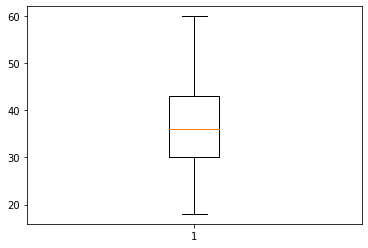

DistanceFromHome


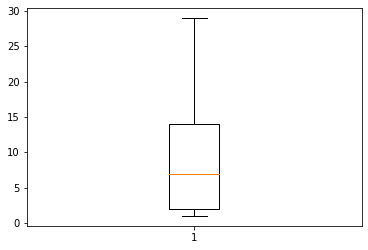

Education


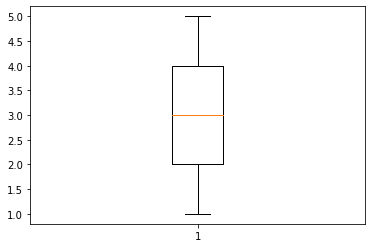

EmployeeCount


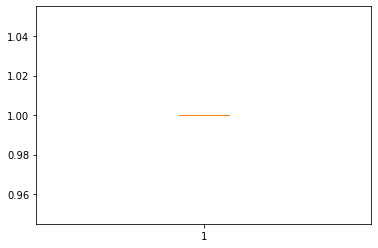

EmployeeID


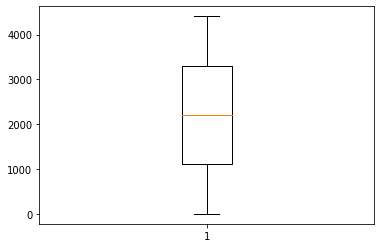

JobLevel


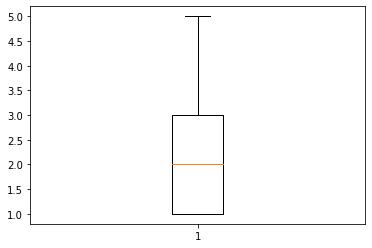

MonthlyIncome


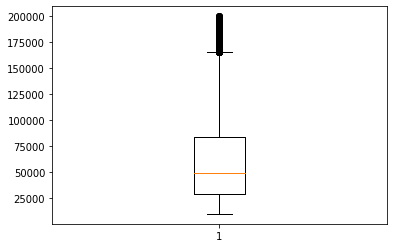

NumCompaniesWorked


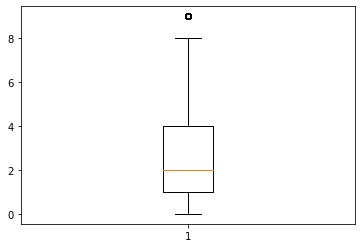

PercentSalaryHike


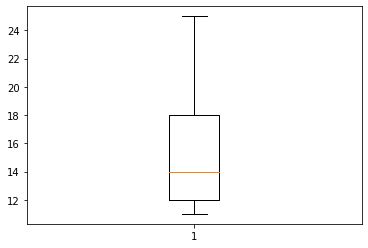

StandardHours


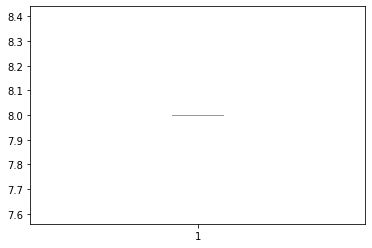

StockOptionLevel


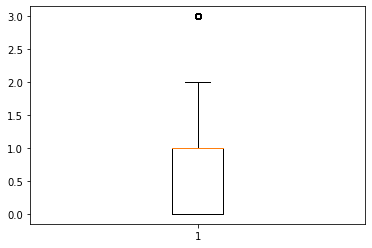

TotalWorkingYears


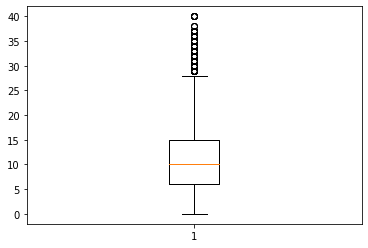

TrainingTimesLastYear


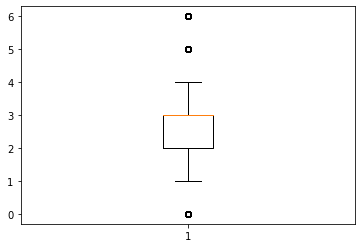

YearsAtCompany


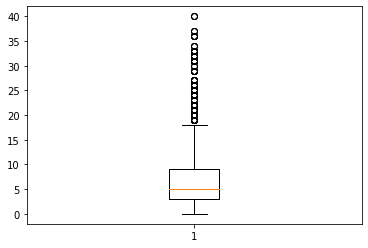

YearsSinceLastPromotion


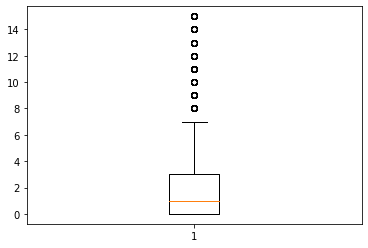

YearsWithCurrManager


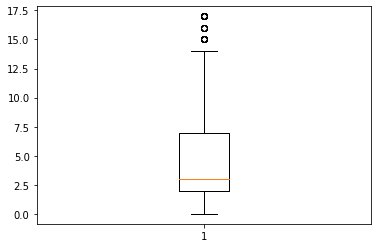

In [79]:
for i in Numerical_columns:
    print(i)
    plt.boxplot(dataset[i])
    plt.show()

In [80]:
dataset = dataset.loc[dataset["MonthlyIncome"] < 160000]
dataset = dataset.loc[dataset["NumCompaniesWorked"] < 6]
dataset = dataset.loc[dataset["TotalWorkingYears"] < 28]
dataset = dataset.loc[dataset["YearsAtCompany"] < 18]
dataset = dataset.loc[dataset["YearsSinceLastPromotion"] < 8]
dataset = dataset.loc[dataset["YearsWithCurrManager"] < 13]

In [81]:
dataset.dropna()

,Age,Attrition,BusinessTravel,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeID,Gender,...,NumCompaniesWorked,Over18,PercentSalaryHike,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager
0,51,No,Travel_Rarely,Sales,6,2,Life Sciences,1,1,Female,...,1.0,Y,11,8,0,1.0,6,1,0,0
1,31,Yes,Travel_Frequently,Research & Development,10,1,Life Sciences,1,2,Female,...,0.0,Y,23,8,1,6.0,3,5,1,4
3,38,No,Non-Travel,Research & Development,2,5,Life Sciences,1,4,Male,...,3.0,Y,11,8,3,13.0,5,8,7,5
4,32,No,Travel_Rarely,Research & Development,10,1,Medical,1,5,Male,...,4.0,Y,12,8,2,9.0,2,6,0,4
6,28,Yes,Travel_Rarely,Research & Development,11,2,Medical,1,7,Male,...,2.0,Y,20,8,1,5.0,2,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4404,29,No,Travel_Rarely,Sales,4,3,Other,1,4405,Female,...,1.0,Y,18,8,0,6.0,2,6,1,5
4405,42,No,Travel_Rarely,Research & Development,5,4,Medical,1,4406,Female,...,3.0,Y,17,8,1,10.0,5,3,0,2
4406,29,No,Travel_Rarely,Research & Development,2,4,Medical,1,4407,Male,...,2.0,Y,15,8,0,10.0,2,3,0,2
4407,25,No,Travel_Rarely,Research & Development,25,2,Life Sciences,1,4408,Male,...,0.0,Y,20,8,0,5.0,4,4,1,2


Age


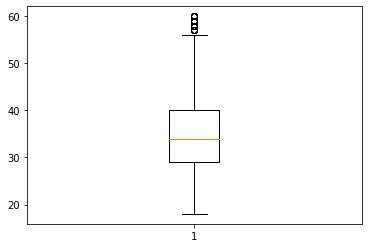

DistanceFromHome


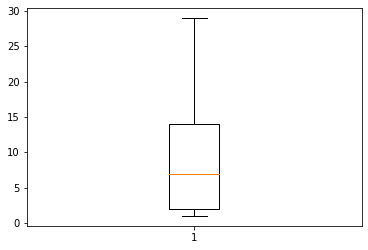

Education


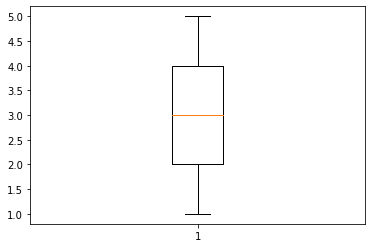

EmployeeCount


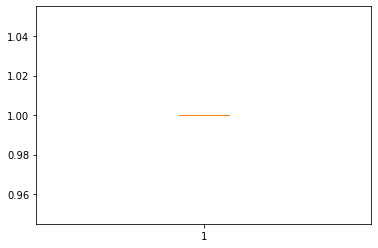

EmployeeID


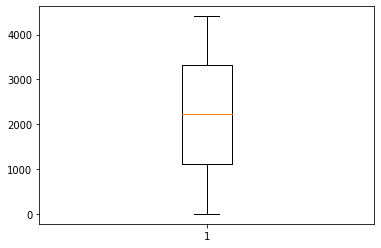

JobLevel


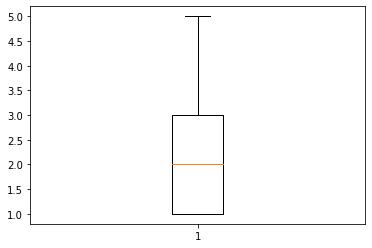

MonthlyIncome


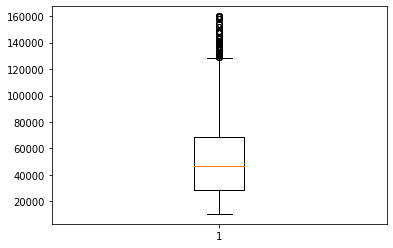

NumCompaniesWorked


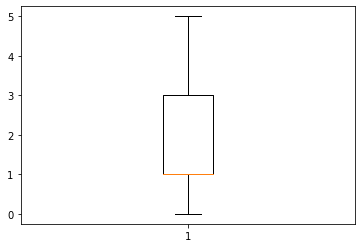

PercentSalaryHike


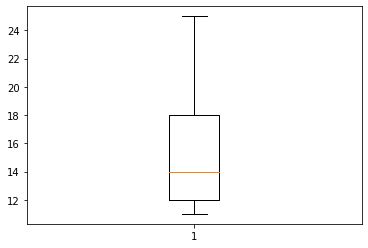

StandardHours


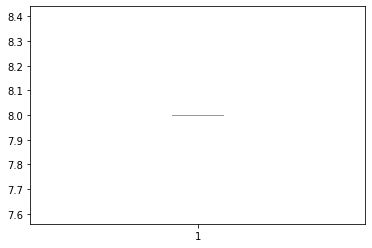

StockOptionLevel


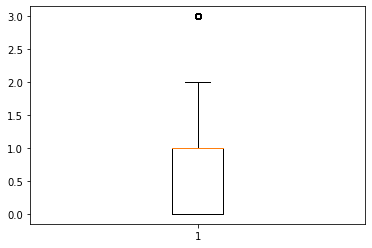

TotalWorkingYears


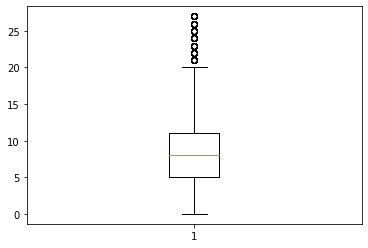

TrainingTimesLastYear


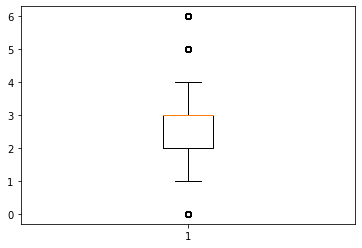

YearsAtCompany


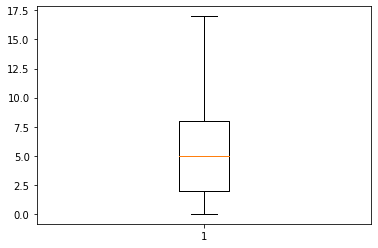

YearsSinceLastPromotion


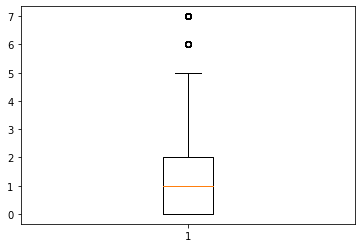

YearsWithCurrManager


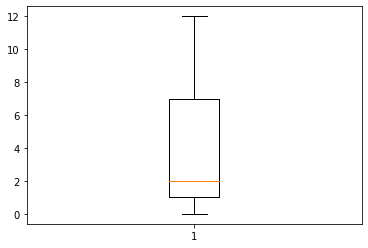

In [82]:
for i in Numerical_columns:
    print(i)
    plt.boxplot(dataset[i])
    plt.show()

#### There is no perfect solution for removal of outliers as the numbers of outliers your reduce the number of outliers are
#### going to increase as removing outliers from all the factors is not possible since we have removed the first stage 
#### outliers from the dataset

### Dataset Is Now Outlier Free

In [83]:
dataset.columns  ### Display the available columns in the dataset

Index(['Age', 'Attrition', 'BusinessTravel', 'Department', 'DistanceFromHome',
       'Education', 'EducationField', 'EmployeeCount', 'EmployeeID', 'Gender',
       'JobLevel', 'JobRole', 'MaritalStatus', 'MonthlyIncome',
       'NumCompaniesWorked', 'Over18', 'PercentSalaryHike', 'StandardHours',
       'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear',
       'YearsAtCompany', 'YearsSinceLastPromotion', 'YearsWithCurrManager'],
      dtype='object')

In [87]:
dataset["attrition"]= pd.factorize(dataset["Attrition"])[0]

In [88]:
dataset

,Age,Attrition,BusinessTravel,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeID,Gender,...,Over18,PercentSalaryHike,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager,attrition
0,51,No,Travel_Rarely,Sales,6,2,Life Sciences,1,1,Female,...,Y,11,8,0,1.0,6,1,0,0,0
1,31,Yes,Travel_Frequently,Research & Development,10,1,Life Sciences,1,2,Female,...,Y,23,8,1,6.0,3,5,1,4,1
3,38,No,Non-Travel,Research & Development,2,5,Life Sciences,1,4,Male,...,Y,11,8,3,13.0,5,8,7,5,0
4,32,No,Travel_Rarely,Research & Development,10,1,Medical,1,5,Male,...,Y,12,8,2,9.0,2,6,0,4,0
6,28,Yes,Travel_Rarely,Research & Development,11,2,Medical,1,7,Male,...,Y,20,8,1,5.0,2,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4404,29,No,Travel_Rarely,Sales,4,3,Other,1,4405,Female,...,Y,18,8,0,6.0,2,6,1,5,0
4405,42,No,Travel_Rarely,Research & Development,5,4,Medical,1,4406,Female,...,Y,17,8,1,10.0,5,3,0,2,0
4406,29,No,Travel_Rarely,Research & Development,2,4,Medical,1,4407,Male,...,Y,15,8,0,10.0,2,3,0,2,0
4407,25,No,Travel_Rarely,Research & Development,25,2,Life Sciences,1,4408,Male,...,Y,20,8,0,5.0,4,4,1,2,0


### pd.factorize is used to convert categorial variable into numerical variable

### Now the data is clean its time to analyise the data 

#### Splitting up the data into stay and left where stay means who stayed in the company and left means who left the copany

In [113]:
left=dataset[dataset["Attrition"] == "Yes"]
stay=dataset[dataset["Attrition"] == "No"]

In [118]:
for i in Numerical_columns:
    print("The Numerical Value is",i , "\n")
    print("The mean of the" , i , "is" , dataset[i].mean() )
    print("The mean of the" , i , " Who stayed is" , stay[i].mean())
    print("The mean of the" , i , " Who left is" , left[i].mean(),"\n")
    print("The value Counts of people staying is as follow", stay[i].value_counts())
    print("The value Counts of people leaving is as follow", left[i].value_counts())
    
    difference = np.abs((stay[i].mean()) - (left[i].mean()))
    
    print(" The difference in the value of the stay and left numerical factors are" , difference )
    
    
    if difference > 4 :
        print("this factor" , i , "is noticiable")
    

The Numerical Value is Age 

The mean of the Age is 35.045172413793104
The mean of the Age  Who stayed is 35.7120397186595
The mean of the Age  Who left is 31.70807453416149 

The value Counts of people staying is as follow 35    165
34    159
38    123
32    117
36    117
29    117
30    111
31    111
27    108
37    102
33    102
28     96
45     81
26     72
42     66
40     61
43     57
41     55
25     51
24     48
39     48
44     42
49     36
47     33
51     30
48     30
46     30
23     24
53     24
50     24
22     24
54     21
55     21
21     18
52     15
58     15
20     15
56     12
59      9
18      9
57      6
19      6
60      6
Name: Age, dtype: int64
The value Counts of people leaving is as follow 31    42
29    42
26    27
28    27
35    24
33    24
24    18
34    18
20    18
22    15
25    15
21    15
44    15
40    15
30    15
19    15
23    12
32    12
18    12
39    12
46     9
37     9
41     9
27     9
36     9
50     9
49     6
55     6
52     3
51     3
56  

In [121]:
### We can infer out that people of the age group 26 - 32 are leaving the company , but the people staying in the company 
#### are of the agr group of 29 up people so some employee of the similar age are also staying so the age cannot be 
####considered as primary factor mean age of the people staying is 31 and people leaving is 35


#### Distance is also not the significant factor because the mean of both the DistanceFromHome is same there, Peoples from
#### 10km are also coming and leaving the company this cant be consider as significant factor for analysis 


#### Most of the employee have are Bachelors in the company followed by the Masters and College,
#### People who have completed their masters and college and bachelors are more likely to leave the company , Employee
#### with the degree below college and doctrate are less likely to leave the company


#### The average monthly Income Is in range of 54k only for the one who left and for the one who stayed

#### The employee working in single company or zero company or 4 comapny are more likely to leave the Company

#### Employee with 15 % Salary Hike are more likely to leave the company ramge of 11-14 % are elaving the company

#### The employee with 6 years of working nis likely to leave the company and the emplyee with 9 or more years of expeience
#### tend to stay


#### TotalWorkingYears == 1 tends to leave more and totalworkingyear == 10

#### TrainingTimeLastYear == 2 & 3

####  YearsAtCompany == 1 - 5

In [124]:
stay.shape ### Gives the shape of the data show number of rows and Columns

(2417, 25)

In [125]:
left.shape

(483, 25)

In [147]:
#### let Us know more about the data : Kutosis / Skewness 

for i in Numerical_columns:
    print("The Numerical Value is" , i)
    if dataset[i].kurtosis() == 0:
        print("The given data is Platykurtic means data is well spread \n")
    elif dataset[i].kurtosis() > 0:
        print("The given data is Mesokurtic means data is concentrated toward mean \n")
    else:
        print("The given data is Paltykurtic means data is concentrated towrds the tail \n")

The Numerical Value is Age
The given data is Paltykurtic means data is concentrated towrds the tail 

The Numerical Value is DistanceFromHome
The given data is Paltykurtic means data is concentrated towrds the tail 

The Numerical Value is Education
The given data is Paltykurtic means data is concentrated towrds the tail 

The Numerical Value is EmployeeCount
The given data is Platykurtic means data is well spread 

The Numerical Value is EmployeeID
The given data is Paltykurtic means data is concentrated towrds the tail 

The Numerical Value is JobLevel
The given data is Mesokurtic means data is concentrated toward mean 

The Numerical Value is MonthlyIncome
The given data is Mesokurtic means data is concentrated toward mean 

The Numerical Value is NumCompaniesWorked
The given data is Paltykurtic means data is concentrated towrds the tail 

The Numerical Value is PercentSalaryHike
The given data is Paltykurtic means data is concentrated towrds the tail 

The Numerical Value is Standa

Age


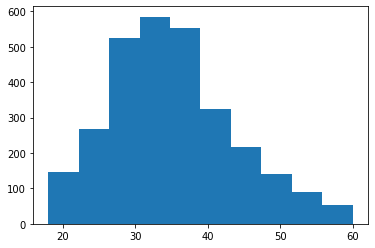

DistanceFromHome


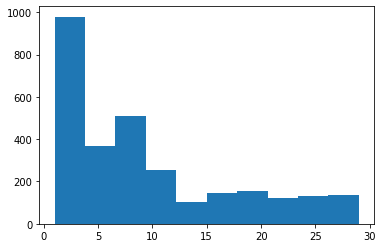

Education


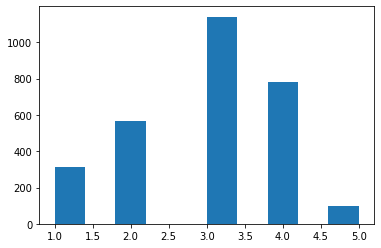

EmployeeCount


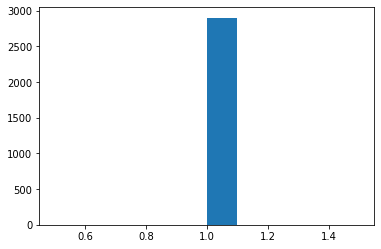

EmployeeID


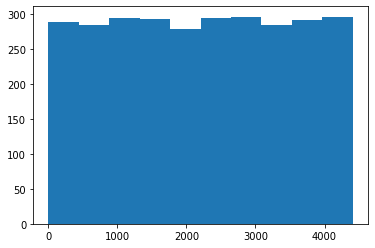

JobLevel


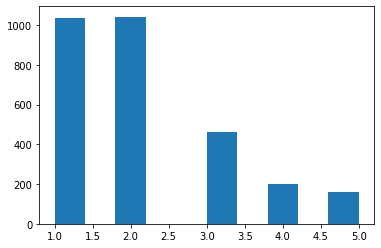

MonthlyIncome


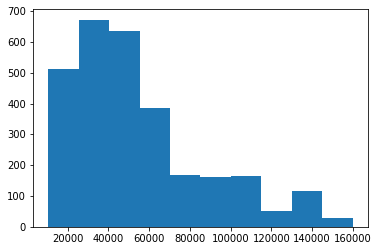

NumCompaniesWorked


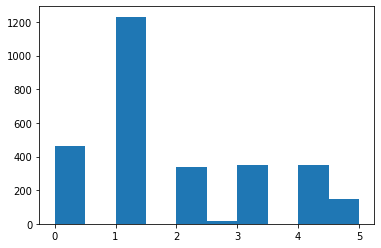

PercentSalaryHike


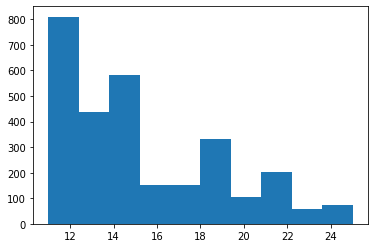

StandardHours


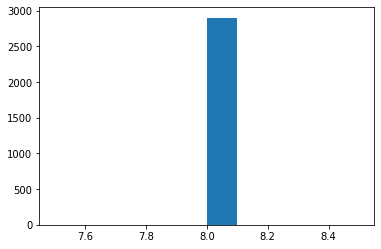

StockOptionLevel


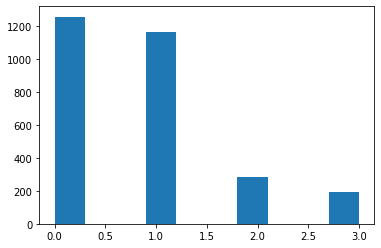

TotalWorkingYears


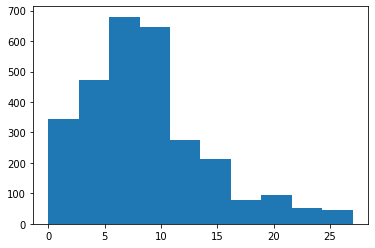

TrainingTimesLastYear


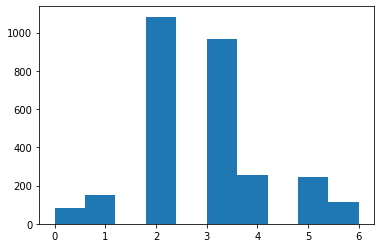

YearsAtCompany


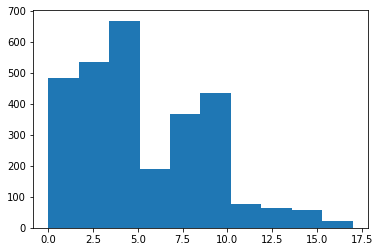

YearsSinceLastPromotion


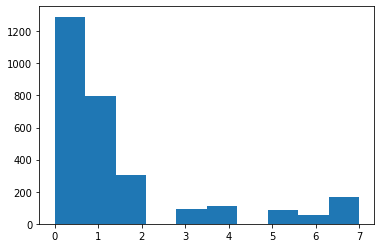

YearsWithCurrManager


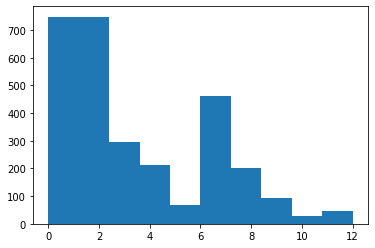

In [148]:
for i in Numerical_columns:
    print(i)
    plt.hist(dataset[i])
    plt.show()

In [145]:
### We can also check which gender leaving the company is more 

print(left["Gender"].value_counts(),"\n")
print(stay["Gender"].value_counts(),"\n")
print(dataset["Gender"].value_counts(),"\n")

print(" Males are more tend to leave the company then the female")

Male      303
Female    180
Name: Gender, dtype: int64 

Male      1439
Female     978
Name: Gender, dtype: int64 

Male      1742
Female    1158
Name: Gender, dtype: int64 

 Males are more tend to leave the company then the female


In [151]:
dataset.corr() ### Gives the correlation between different columns

,Age,DistanceFromHome,Education,EmployeeCount,EmployeeID,JobLevel,MonthlyIncome,NumCompaniesWorked,PercentSalaryHike,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager,attrition
Age,1.000000,0.002076,-0.022214,NaN,0.013338,0.009841,-0.042883,0.361745,-0.058284,NaN,-0.037704,0.600561,-0.007548,0.140419,0.078557,0.104520,-0.174444
DistanceFromHome,0.002076,1.000000,0.010749,NaN,0.003293,-0.030640,-0.022795,-0.015492,0.026006,NaN,0.002947,-0.009761,-0.005816,0.013143,0.032880,0.019734,-0.006047
Education,-0.022214,0.010749,1.000000,NaN,-0.017907,0.042088,0.007895,0.012885,-0.032867,NaN,-0.000088,0.025687,0.009416,-0.029636,-0.029452,-0.022720,-0.043793
EmployeeCount,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
EmployeeID,0.013338,0.003293,-0.017907,NaN,1.000000,-0.000828,-0.003941,-0.002033,0.004575,NaN,-0.025132,0.011846,0.005561,0.017201,-0.002295,0.014066,-0.010526
JobLevel,0.009841,-0.030640,0.042088,NaN,-0.000828,1.000000,0.056983,-0.002275,0.047891,NaN,0.010854,-0.007755,-0.007810,0.018208,-0.004712,-0.004909,0.000301
MonthlyIncome,-0.042883,-0.022795,0.007895,NaN,-0.003941,0.056983,1.000000,-0.083095,0.005319,NaN,0.020658,-0.049715,0.047949,0.020408,0.036647,0.025054,-0.001197
NumCompaniesWorked,0.361745,-0.015492,0.012885,NaN,-0.002033,-0.002275,-0.083095,1.000000,-0.057120,NaN,0.017425,0.398607,-0.006154,-0.183690,-0.100667,-0.152290,-0.010010
PercentSalaryHike,-0.058284,0.026006,-0.032867,NaN,0.004575,0.047891,0.005319,-0.057120,1.000000,NaN,0.006214,-0.032125,-0.066117,0.003922,-0.017046,-0.013647,0.044767
StandardHours,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [152]:
#### By seeing at the correlation table we can say that with increase in the age there is reduction in the attrition rate of
#### employee


#### With the increasing age at the company attrition is showing negative correlation.

#### With the increase in the year with current manager attrition is decreasing

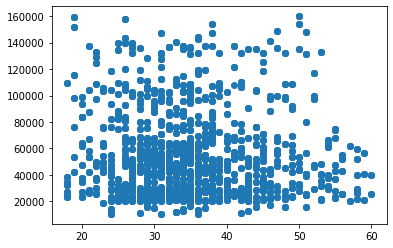

In [154]:
plt.scatter(dataset["Age"] ,dataset["MonthlyIncome"])

In [155]:
#### We can see that people in the age of 50 -60  dont have salary more than 80k